In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Leer la imagen y cambiar el espacio de color
imgname = 'img/Problema1.jpg'
imgMSER = cv2.imread(imgname)
gaussian_filter = cv2.GaussianBlur(imgMSER, (13,13), 0)

grayMSER = cv2.cvtColor(imgMSER, cv2.COLOR_BGR2GRAY)
gaussgrayMSER = cv2.cvtColor(gaussian_filter, cv2.COLOR_BGR2GRAY)

In [17]:
def putText(img, title, org, fontFace, fontScale, color, thickness):
    cv2.putText(img=img,
text=title,
org=org,
fontFace=fontFace,
fontScale=fontScale,
color=color,
thickness=thickness)

In [21]:
def detectorMser(img_gray, img_normal):
    mser = cv2.MSER_create()
    coordinates, bboxes = mser.detectRegions(img_gray)

    coords = []
    for coord, bbox in zip(coordinates, bboxes):
        x,y,w,h = bbox
        if w< 10 or h < 10 or w/h > 5 or h/w > 5:
            continue
        coords.append(coord)
    print( "Regiones Detectadas usando MSER Detector : {}".format(len(coordinates)))

    colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
    [43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
    [43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
    [116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
    [200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
    [200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
    [200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
    [80, 43, 200], [43, 43, 200]]
    # Pintar las regiones con colores aleatorios
    np.random.seed(0)
    canvas1 = img_normal.copy()

    for cnt in coords:
        xx = cnt[:,0]
        yy = cnt[:,1]
        color = colors[np.random.choice(len(colors))]
        canvas1[yy, xx] = color

    coordenadas = str(len(coordinates))

    putText(img=canvas1, title="Regiones: " + coordenadas, org=(10,100), fontFace=3, fontScale=4, color=(60,35,239), thickness=12)
        
    plt.imshow(canvas1[:, :, ::-1])

In [19]:
def show_with_matplotlib_problema1(st01, st02):
    figure, axis = plt.subplots(2,2, figsize=(10, 7),)

    #imagen oringal
    plt.subplot(2,2,1)
    plt.title("Original")
    plt.imshow(st01[:,:,::-1])
    plt.axis('off')

    #imagen gaussiana 13x13
    plt.subplot(2,2,2)
    plt.title("Filtro Gaussiano 13x13")
    plt.imshow(st02[:,:,::-1])
    plt.axis('off')

    #MSER ORIGINAL
    plt.subplot(2,2,3)
    plt.title("MSER Original")
    detectorMser(grayMSER, imgMSER)
    plt.axis('off')

    #MSER 13x13
    plt.subplot(2,2,4)
    plt.title("MSER Filtro Gaussiano 13x13")
    detectorMser(gaussgrayMSER, gaussian_filter)
    plt.axis('off')
    
    plt.show()

Regiones Detectadas usando MSER Detector : 1184
Regiones Detectadas usando MSER Detector : 941


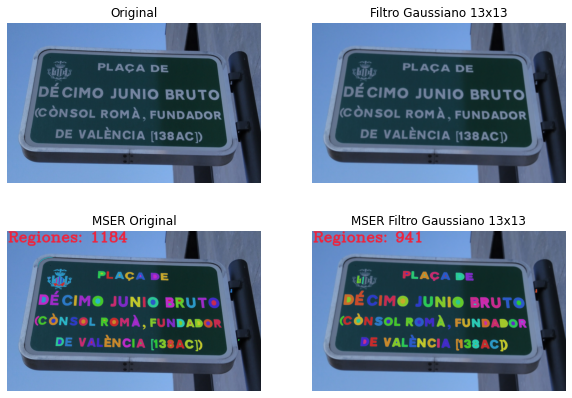

In [22]:
show_with_matplotlib_problema1(imgMSER, gaussian_filter)